### Authors:
Aiden Smith (),

Benjamin Palay (1815593), https://www.kaggle.com/benpalayy

Gia Croock (),

Rael Ware (),


## Introduction

The titanic is known as one of the most infamous shipwrecks in history. Of the 2240 passengers aboard the ship, at least 1500 died. The titanic machine learning competition by Kaggle presents the objective of predicting whether or not a passenger survivved on the titanic. The goal is to train machine learning models so that they know how certain features affect the survival of a passenger. 
We are giving a training set and a testing set, with the feature correlations must be derived and the models intially tested only on the training set.
 

# 1. Import libraries



In [894]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import array
import matplotlib.pyplot as pl
from sklearn.ensemble import VotingClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
# Tuning
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data



In [895]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [896]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [897]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data description


The data provided is split into two groups:
1) The training set (train.csv)
2) The testing set (test.csv)

The training set includes a survival column which indicates whether or not the passenger survived. This data set is used to create the machine learning model.
The testing set is used to determine how well the model (generated from the training data set) performs on new unseen data. The testing data set does not provide the passengers' survival status. The model generated predicts the passengers' survival status.

The table below provides all the relevant information about the columns in the data sets:

| Column Name          | Description                                                | Key                    |
| ---------------------| ---------------------------------------------------------- | ---------------------- |
| __PassengerId__      | Passenger Identity                                         |                        | 
| __Survived__         | Passenger survival status                                  | 0 = No, 1 = Yes        | 
| __Pclass__           | Ticket class, a representation of socio-economic status (SES)| 1 = 1st class, 2 = 2nd class, 3 = 3rd class | 
| __Name__             | Passenger's name                                           |                        | 
| __Sex__              | Passenger's sex                                            |                        |
| __Age__              | Passengers age (in years)                                  |                        |
| __SibSp__            | Number of sibling and/or spouse travelling with passenger  |                        |
| __Parch__            | Number of parent and/or children travelling with passenger |                        |
| __Ticket__           | Ticket number                                              |                        |
| __Fare__             | Price of the ticket                                        |                        |
| __Cabin__            | Cabin number                                               |                        |
| __Embarked__         | Point of embarkation                                       | C = Cherbourg, Q = Queenstown, S = Southampton |

More information can be found under the [data](https://www.kaggle.com/c/titanic/)

# 4. Data Analysis 


Exploratory data analysis is used to gain insight on the data provided. This is achieved by using visualisation tools such as graphs and tables. It will allow us to understand the data and derive preliminary conclusions. Furthermore, it will summerise important trends, characteristics, and abnormalities in the dataset which will ultimately aid in training the model.

The following is explored and analysed:
- Data Types
- The shape of the data
- Missing values in the data
- Statistics derived from the data

## 4.1 Data types,data shapes, missing data and summary statistics

### 4.1.1.Data Types

In [898]:
# Non-null count and data types of the training
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <font color='pink'>Observation:</font>  The training-set has 891 rows and 11 features including the __target variable (survived).__ 2 of the features are floats, 5 are integers and 5 are objects. When training, the model requires the data to all be in the form of numbers, therefore these columns will be converted later on.

### 4.1.2.Data Shape

In [899]:

print("The shape of the training data set: ", train.shape)
print("The shape of the testing data set: ", test.shape)

The shape of the training data set:  (891, 12)
The shape of the testing data set:  (418, 11)


<font color='pink'>Observation:</font> The testing data set has one column less column than the training data set (the Survived column). As discussed above in section 3, survived is our response/target variable and will therefore be determined from the model derived from the training data.

### 4.1.3.Missing Values

In [900]:

#Determine what percentage of data is missing values in each column of the training dataset
totalNumberOfDataPoints = train.isnull().sum().sort_values(ascending=False)
percentMissing = train.isnull().sum()/train.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat([totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)

,Total missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [817]:
#Determine what percentage of data is missing values in each column of the testing dataset
totalNumberOfDataPoints = test.isnull().sum().sort_values(ascending=False)
percentMissing = test.isnull().sum()/test.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat([totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)

,Total missing,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


<font color='pink'>Observation:</font> From the two tables above it can be seen that the training set has missing values in the Cabin, Age and Embarked columns. The testing dataset has missing values in the Cabin, Age and Fare columns. 
For the training dataset, the Embarked column only contains two missing values which can be easily dropped or filled. The Age column on the other hand has 177 missing values. We therefore, cannot drop the rows which have missing values in the age column as this will eliminate 20% of the training data. Therefore, these values need to be filled in. The approach taken to fill in the missing values is discussed below in section 5.2. Since the Cabin column is missing 77% of data points, we have decided to drop this column. 

### 4.1.4.Statistics

In [901]:
# Summary of the statistics for the training data set 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



The table above gives an overview of the central tendencies of the numeric data in the testing dataset. <br /> <font color='pink'>Observations:</font> 
- 38% of people in the training dataset survived the Titanic 
- The passenger age ranges from 0.4 to 80 years old.
- There is an outlier in the Fare column because of the differences between the 75th percentile, standard deviation, and the max value (512). We will thus determine how to deal with this outlier by either dropping its corresponding row or filling the outlier with an appropriate value. 

## 4.2 Feature analysis


For feature analysis the training dataset will be split into two categories:
1) Categorical variables
2) Numerical variables

Categorical variables have values belonging to one of two or more categories. Numerical variables have a continuous distribution.
Identifying which variables are categorical and which variables are numerical will hel structure the data analysis properly. For example it makes no sense to determine the average of a categorical variable such as sex or class. Furthermore, sex, class and embarked have no intrinsic ordering to its value. 

### 4.2.1 Categorical variables


In this data set the categorical variables are:
1) Sex
2) Pclass 
3) Embarked.

#### 4.2.1.1.Categorical variable: Sex

In [902]:
# Value counts of the sex column
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

<font color='pink'>Observation:</font> There are 263 more male passengers than female passengers in the training dataset. Therefore there it is assumend that the test dataset will have a similiar distribution of sex.

In [903]:

# Mean of survival according to sex
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

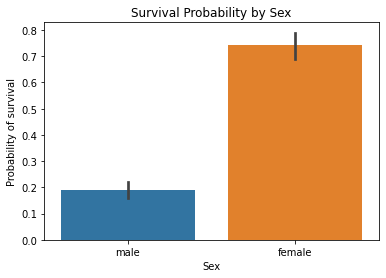

In [821]:

# visualisation for the probability of survival according to sex
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Probability of survival')
plt.title('Survival Probability by Sex')

<font color='pink'>Observation:</font> Female passengers are more likely to survive.

#### 4.2.1.2.Categorical variable: Pclass

In [822]:

# Value counts of the Pclass column in the training dataset

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [823]:

# Mean of survival by passenger class in the training dataset

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


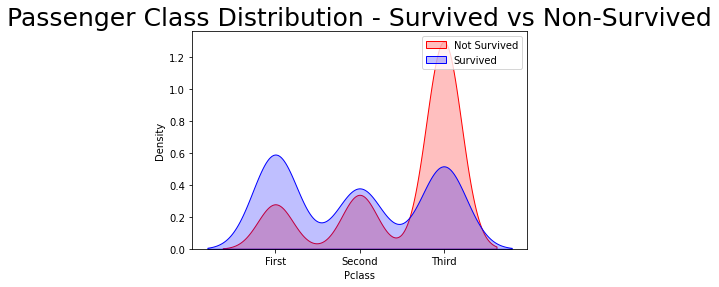

In [824]:
 
#Pclass distributions for survived and not survived
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels);

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

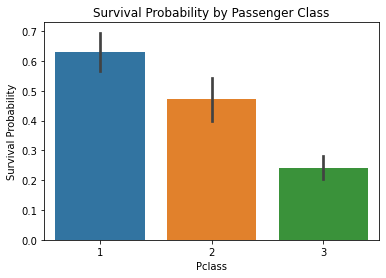

In [825]:

sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

<font color='pink'>Observation:</font> The probability of survival decreases with a decrease in passenger class. It can therefore be assumed that first class passengers were prioritised during the evacuation. Evidently, from the two graphs above, Pclass plays an important role in determining whether a passenger did or did not survive. According to the training dataset, 63% of the 1st class passengers survived, 48% of the 2nd class passengers survived and only 24% of the 3rd class passengers survived.

#### 4.2.1.3.Categorical variables combined: Sex and Plass

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

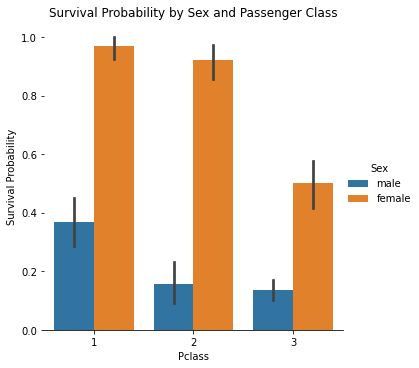

In [826]:

# Survival by gender and passenger class
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar').despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

<font color='pink'>Observation:</font>The graph above indicates that in every class, females where always more likely to survive. It can also be seen that males in the first class were more likely to survive than in any other class.

#### 4.2.1.4.Categorical variable: Embarked

In [827]:
# Value counts of the Embarked column 
#NAN is the missing values in Embarked
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [828]:
# Mean of survival by point of embarkation
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

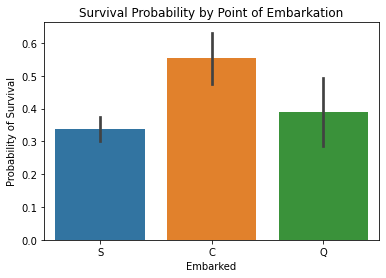

In [829]:
#Visualisation for the probability of survival according to point of embarkation
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Probability of Survival')
plt.title('Survival Probability by Point of Embarkation')

<font color='pink'>Observation:</font> The probability of survival is highest for location C and lowest for location S.
Perhaps first class passengers embarked from location C and therefore because first class passengers had a higher chance of survival, location c also has the highest chance of survival. As an alternative perhaps third class passengers embarked from location S and because third class passengers had the lowest chance of survival , location S also has the lowest survival probability. This hypothesis is tested in section 4.2.1.5 below. 

#### 4.2.1.5.Categorical variable combined: Embarked and Class

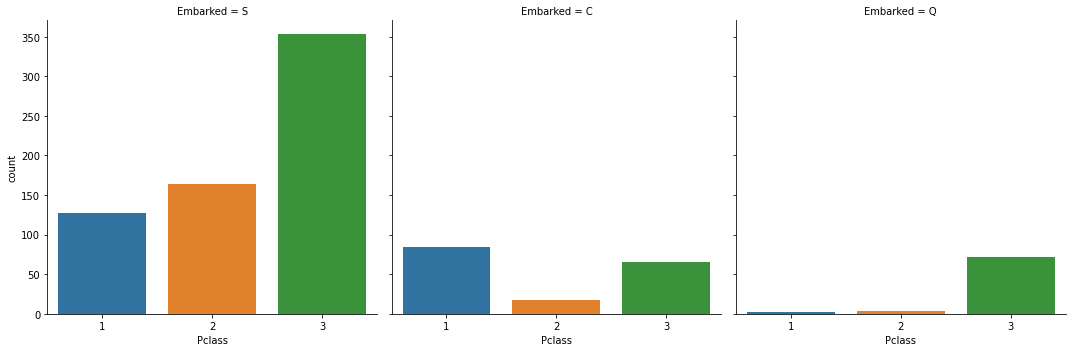

In [830]:
#Gia
# Visualisation for the relationship between class and embark 
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

<font color='pink'>Observation:</font> The hypothesis discussed in section 4.1.2.4 appears to be correct.  Location S has majority of the third class passengers and the majority of passengers embarking from location C are first class.

### 4.2.2 Numerical variables

Gia
In this dataset, the numerical variables are:
1) SibSp
2) Parch
3) Age
4) Fare

#### 4.2.2.1.Numerical variables correlation with survival

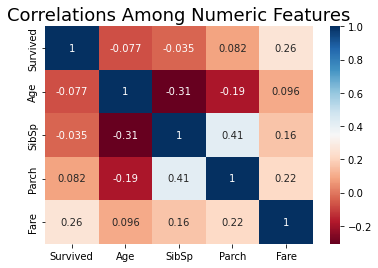

In [831]:
#Heatmap of numerical variables
df_num = train[['Survived','Age','SibSp','Parch','Fare']]
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

<font color='pink'>Observation:</font> The heatmap displayed above shows that Parch and SiSp often travel together.Therefore it will useful to create a isAlone and a family size feature.
we also see that Fare has a pretty large positive correlation to survival, thus it may be an important metric in training the model. 

#### 4.2.2.2.Numerical variable: SibSp

In [832]:
# Value counts of the SibSp column 
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [833]:
# Mean of survival by SibSp
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

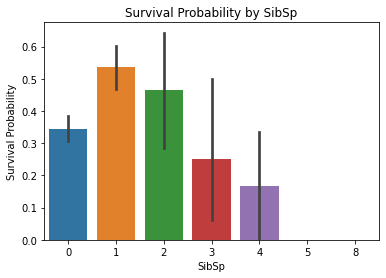

In [834]:
#Visualisation for probability of survival according to SiSP 
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### 4.2.2.3.Numerical variable: Parch

In [835]:
# Value counts of the Parch column 
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [836]:
# Mean of survival by Parch
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

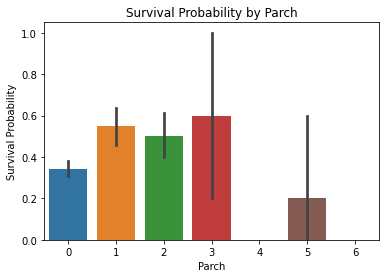

In [837]:
#Visualisation for probability of survival according to Parch
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### 4.2.2.4.Numerical variable: Age

Text(0.5, 1.0, 'Passenger Age Distribution')

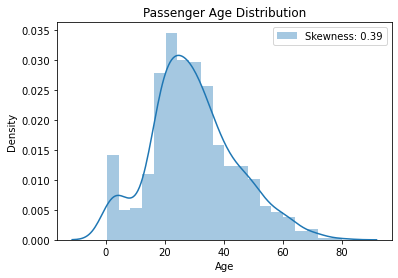

In [838]:
# Passenger age distribution
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

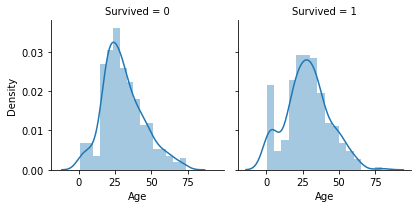

In [839]:
# Age distribution by survival
sns.FacetGrid(train, col = 'Survived').map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

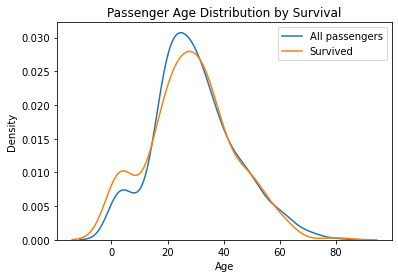

In [840]:
sns.kdeplot(train['Age'], label = 'All passengers')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.legend()
plt.title('Passenger Age Distribution by Survival')

#### 4.2.2.5.Numerical variable: Fare

Text(0, 0.5, 'Passenger Fare Distribution')

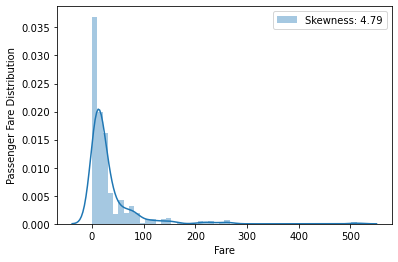

In [841]:
# Passenger fare distribution
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

<font color='pink'>Observation:</font> The majority of passengers paid low fares where there are few people who paid very large fares.

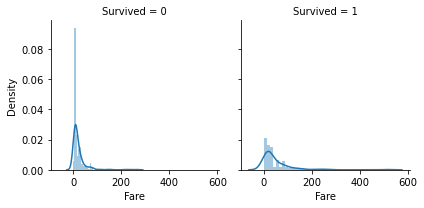

In [842]:
sns.FacetGrid(train, col = 'Survived').map(sns.distplot, 'Fare')

Text(0.5, 1.0, 'Passenger Fare Distribution by Survival')

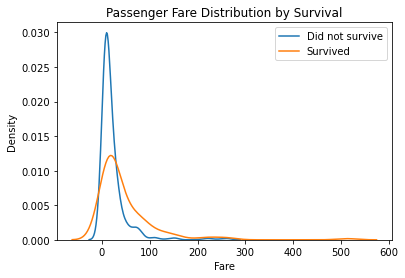

In [843]:
sns.kdeplot(train['Fare'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Fare'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Fare')
plt.legend()
plt.title('Passenger Fare Distribution by Survival')

#### 4.2.2.6.Detect outliers in numerical variables

Outliers are points in the dataset that don't conform with majority of the data (they are extreme values). Outliers need to be addressed as they tend to skew data and can cause inaccurate model predictions. The Tukey method is used to detect these outliers. Outliers can only be determined for numeric data.

In [844]:
#Function to predict outliers
# def detect_outliers(df, n, features):
#     """"
#     This function loops through the list of features and detects outliers in each feature. A data point is considered to be 
#     an outlier if it is less than Q1-1.5*IQR or if it is greater than Q3+1.5*IQR. Once the outliers have been determined for 
#     a feature, their indices will be stored in a list and then the loop will proceed to the next feature. This process repeats
#     until the last feature is complete. Finally, using the list with the indices of the outliers, the frequency of outliers is
#     determined and if the frequency is greater than n then the list fill be returned.    
#     """
#     outlierIndices = [] 
#     for col in features: 
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
#         outlierStep = 1.5 * IQR 
#         outlierList = df[(df[col] < Q1 - outlierStep) | (df[col] > Q3 + outlierStep)].index
#         outlierIndices.extend(outlierList) 
#     outlierIndices = Counter(outlierIndices)
#     multipleOutliers = list(key for key, value in outlierIndices.items() if value > n) 
#     return multipleOutliers
# outliers_to_drop_test = detect_outliers(test, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
# outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
# print("The indices where outliers occur are {}: ".format(len(outliers_to_drop)), outliers_to_drop) 

In [845]:
# Outliers in numerical variables
#Visualise the 10 rows identified above as rows containing outliers
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S


### 4.2.3 Correlation between categorical and numerical

#### 4.2.3.1.All variables

<AxesSubplot:>

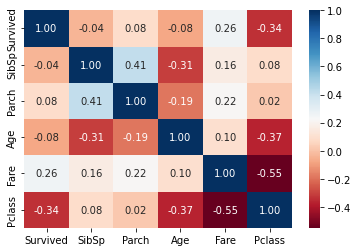

In [846]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare','Pclass']].corr(), annot = True, fmt = '.2f', cmap='RdBu')

<font color='pink'>Observation:</font>  Fare appears to have a high correlation with survival and Pclass has a high ngeative correlation with survival.

# 5. Data preprocessing

Now that we know what features are correlated and some other important factors, we can get the dataset into a form to be modelled and trained. This includes:
- Data transformation 
- Dealing with ouliers
- Drop and fill missing values
- Feature engineering
- Feature encoding

## 5.1 Data transformation

Apply a log transformation to fair as it has a high right-skewnewss

Text(0.5, 1.0, 'Passenger Fare Distribution')

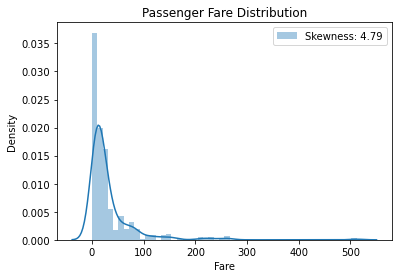

In [847]:
#  fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [848]:
# In order to reduce skewness in fare, apply log transformation 
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Fare Distribution After Log Transformation')

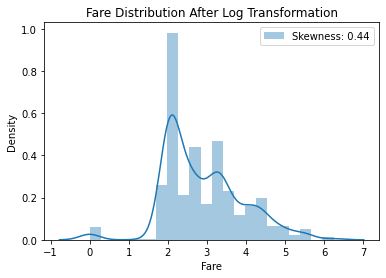

In [849]:
# After log transformation

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Fare Distribution After Log Transformation')

## 5.2 Remove Outliers

In [850]:
# Drop outliers 
def detect_outliers(df, n, features):
    """"
    This function loops through the list of features and detects outliers in each feature. A data point is considered to be 
    an outlier if it is less than Q1-1.5*IQR or if it is greater than Q3+1.5*IQR. Once the outliers have been determined for 
    a feature, their indices will be stored in a list and then the loop will proceed to the next feature. This process repeats
    until the last feature is complete. Finally, using the list with the indices of the outliers, the frequency of outliers is
    determined and if the frequency is greater than n then the list fill be returned.    
    """
    outlierIndices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlierStep = 1.5 * IQR 
        outlierList = df[(df[col] < Q1 - outlierStep) | (df[col] > Q3 + outlierStep)].index
        outlierIndices.extend(outlierList) 
    outlierIndices = Counter(outlierIndices)
    multipleOutliers = list(key for key, value in outlierIndices.items() if value > n) 
    return multipleOutliers
outliers_to_drop_test = detect_outliers(test, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("The indices where outliers occur are {}: ".format(len(outliers_to_drop)), outliers_to_drop) 
print("Train Set Before: {} rows".format(len(train)))
# train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("Train Set After: {} rows".format(len(train)))
print("Test Set Before: {} rows".format(len(test)))
# test = test.drop(outliers_to_drop_test, axis = 0).reset_index(drop = True)
print("Test Set After: {} rows".format(len(test)))

The indices where outliers occur are 3:  [27, 88, 341]
Train Set Before: 891 rows
Train Set After: 891 rows
Test Set Before: 418 rows
Test Set After: 418 rows


<font color='pink'>Observation:</font>  Dropping outliers does not seem to improve scores later on, therefore only drop for specific Machine Learning Algorithms. 

## 5.3 Drop and fill missing values

In [851]:
# Drop ticket and cabin features from training and test set as they are unique or missing many values
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [852]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [853]:
# Fill missing value in Embarked with mode as only 3 values
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode, inplace = True)

In [854]:
test.isnull().sum().sort_values(ascending = False)

Age            86
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [855]:
# Fill missing value for Fare 
median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace = True)

In [856]:
# Check where indeces of missing ages are
age_nan_indices_train = list(train[train['Age'].isnull()].index)
len(age_nan_indices_train)
age_nan_indices_test = list(test[test['Age'].isnull()].index)


Age is negatively correlated with SibSp, Parch and Pclass as shown in section 4. Loop through each of the rows which have the same corresponding values and fill the missing age with their median. Otherwise fill with the Age median.

In [857]:
median_age = train['Age'].median()

for index in age_nan_indices_train:
    predict_age = train['Age'][(train['SibSp'] == train.iloc[index]['SibSp']) 
                                 & (train['Parch'] == train.iloc[index]['Parch'])
                                 & (train['Pclass'] == train.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        train['Age'].iloc[index] = median_age
    else:
        train['Age'].iloc[index] = predict_age
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
median_age = combine['Age'].median()
for index in age_nan_indices_test:
    #use larger sample to fill test data 
    test['Age'].iloc[index] = median_age  

In [858]:
# Make sure there are no more missing ages 
print(train['Age'].isnull().sum())
test['Age'].isnull().sum()

0


0

## 5.4 Feature engineering

We create new features from existing features to obtain an improved model.

### 5.4.1 Title

In [859]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


In [860]:
#Title from name column
train['Title'] = [name.split(',')[1].split('.')[0].strip() for name in train['Name']]
train[['Name', 'Title']].head()
test['Title'] = [name.split(',')[1].split('.')[0].strip() for name in test['Name']]
test[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [861]:
# Value counts of Title
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [862]:
# visualise the testing titles
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Simplify Title as there are several unique titles that do not necessarily have a trend

In [863]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col',  'Capt', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')


Drop the name column as title has been extracted

In [864]:
train = train.drop('Name', axis = 1)
train.head()

test = test.drop('Name', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,2.057860,Q,Mr
1,893,3,female,47.0,1,0,1.945910,S,Mrs
2,894,2,male,62.0,0,0,2.270836,Q,Mr
3,895,3,male,27.0,0,0,2.159003,S,Mr
4,896,3,female,22.0,1,1,2.508582,S,Mrs


In [865]:
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


<font color='pink'>Observation:</font> Woman and young males had a high chance of survival.

### 5.4.2 byThemselves

Simplify and summarize data to show if passenegers were alone, as opposed to information about both siblings and parents

In [866]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['SibSp', 'Parch', 'FamilySize']].head()

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [867]:
# Create byThemselves feature as familySize may have more information than we need, leading to overfitting

train['byThemselves'] = 0
train.loc[train['FamilySize'] == 1, 'byThemselves'] = 1

test['byThemselves'] = 0
test.loc[test['FamilySize'] == 1, 'byThemselves'] = 1

In [868]:
# Drop SibSp, Parch and FamilySize as this is contained in byThemselves

train = train.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
test = test.drop(['SibSp', 'Parch','FamilySize'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves
0,1,0,3,male,22.0,1.981001,S,Mr,0
1,2,1,1,female,38.0,4.266662,C,Mrs,0
2,3,1,3,female,26.0,2.070022,S,Miss,1
3,4,1,1,female,35.0,3.972177,S,Mrs,0
4,5,0,3,male,35.0,2.085672,S,Mr,1


### 5.4.3 Age*Class

First convert Age into an ordinal variable. Group Ages into 4 age bands 

In [869]:
train['AgeBand'] = pd.cut(train['Age'], 4)
test['AgeBand'] = pd.cut(test['Age'], 4)
print(train['AgeBand'].head(10))

0    (20.315, 40.21]
1    (20.315, 40.21]
2    (20.315, 40.21]
3    (20.315, 40.21]
4    (20.315, 40.21]
5    (20.315, 40.21]
6    (40.21, 60.105]
7     (0.34, 20.315]
8    (20.315, 40.21]
9     (0.34, 20.315]
Name: AgeBand, dtype: category
Categories (4, interval[float64, right]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]


In [870]:
train.loc[train['Age'] <= 20.315, 'Age'] = 0
train.loc[(train['Age'] > 20.315) & (train['Age'] <= 40.21), 'Age'] = 1
train.loc[(train['Age'] > 40.21) & (train['Age'] <= 60.105), 'Age'] = 2
train.loc[train['Age'] > 60.105,'Age'] = 3

test.loc[test['Age'] <= 20.315, 'Age'] = 0
test.loc[(test['Age'] > 20.315) & (test['Age'] <= 40.21), 'Age'] = 1
test.loc[(test['Age'] > 40.21) & (test['Age'] <= 60.105), 'Age'] = 2
test.loc[test['Age'] > 60.105,'Age'] = 3

# Drop age band feature
train = train.drop('AgeBand', axis = 1)
test = test.drop('AgeBand', axis = 1)

In [871]:
# Convert ordinal Age into integer
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')
train['Age'].dtype

dtype('int32')

In [872]:
# Create Age*Class

train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']
train[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,1,1,1
2,1,3,3
3,1,1,1
4,1,3,3


In [873]:
# Bin Fare 
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(test['Fare'], 4)
train['FareBand'].head(10)


0    (-0.001, 2.068]
1     (3.434, 6.239]
2     (2.068, 2.671]
3     (3.434, 6.239]
4     (2.068, 2.671]
5     (2.068, 2.671]
6     (3.434, 6.239]
7     (2.671, 3.434]
8     (2.068, 2.671]
9     (2.671, 3.434]
Name: FareBand, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.068] < (2.068, 2.671] < (2.671, 3.434] < (3.434, 6.239]]

In [874]:
#ordinal encoding, simliar to age
train.loc[train['Fare'] <= 2.066, 'Fare'] = 0
train.loc[(train['Fare'] > 2.066) & (train['Fare'] <= 2.671), 'Fare'] = 1
train.loc[(train['Fare'] > 2.671) & (train['Fare'] <= 3.418), 'Fare'] = 2
train.loc[train['Fare'] > 3.418, 'Fare'] = 3

test.loc[test['Fare'] <= 2.066, 'Fare'] = 0
test.loc[(test['Fare'] > 2.066) & (test['Fare'] <= 2.671), 'Fare'] = 1
test.loc[(test['Fare'] > 2.671) & (test['Fare'] <= 3.418), 'Fare'] = 2
test.loc[test['Fare'] > 3.418, 'Fare'] = 3

In [875]:
train = train.drop(['FareBand'], axis = 1)
test = test.drop(['FareBand'], axis = 1)

In [876]:
# Convert Fare into integer
train['Fare'] = train['Fare'].astype('int')
test['Fare'] = test['Fare'].astype('int')

## 5.5 Feature encoding 

Variables must be numeric to use for machine learning. Age and Fare were done when Binning. 

In [877]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves,Age*Class
0,1,0,3,male,1,0,S,Mr,0,3
1,2,1,1,female,1,3,C,Mrs,0,1
2,3,1,3,female,1,1,S,Miss,1,3
3,4,1,1,female,1,3,S,Mrs,0,1
4,5,0,3,male,1,1,S,Mr,1,3


In [878]:
label = LabelEncoder() 
train['Embarked'] = label.fit_transform(train['Embarked'])
test['Embarked'] = label.fit_transform(test['Embarked'])
train['Title'] = label.fit_transform(train['Title'])
test['Title'] = label.fit_transform(test['Title'])
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves,Age*Class
0,1,0,3,0,1,0,2,2,0,3
1,2,1,1,1,1,3,0,3,0,1
2,3,1,3,1,1,1,2,1,1,3
3,4,1,1,1,1,3,2,3,0,1
4,5,0,3,0,1,1,2,2,1,3


In [879]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,1,3,0,3,0,1
2,1,3,1,1,1,2,1,1,3
3,1,1,1,1,3,2,3,0,1
4,0,3,0,1,1,2,2,1,3


In [880]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,1,3,0,3,0,1
2,1,3,1,1,1,2,1,1,3
3,1,1,1,1,3,2,3,0,1
4,0,3,0,1,1,2,2,1,3


In [881]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,byThemselves,Age*Class
0,892,3,0,1,0,1,2,1,3
1,893,3,1,2,0,2,3,0,6
2,894,2,0,3,1,1,2,1,6
3,895,3,0,1,1,2,2,1,3
4,896,3,1,1,1,2,3,0,3


<AxesSubplot:>

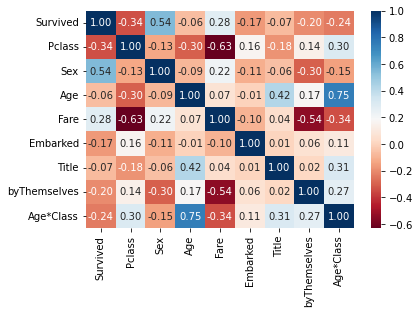

In [882]:
sns.heatmap(train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare','Embarked','Title','byThemselves','Age*Class']].corr(), annot = True, fmt = '.2f', cmap='RdBu')

After data preprocessing, we can see how all of the new and remaining features are correlated in the figure above. Clearly sex has the greatest correlation with survived.

# 6. Modelling

For the modelling part of this project we will utilise the Scikit-learn library for machine learning. 

 As discussed above, this is a classfication problem, so consequently will use classfication models for our training.  We have chosen to investigate the performance of the following classifiers as these are commonly used classifiers:

- Logistic regression
- Multi Layer Perceptron
- K-nearest neighbours
- Gaussian naive bayes
- Linear SVC
- Stochastic gradient descent
- Random forest
- Support vector machines

In this section , we will fit the models to the training data set and evaluate the models' prediction accuracy. Further on we  will implement feature tuning and hyperparameter tuning to further boost the performance of the the following models:

- Logistic regression
- Multi Layer Perceptron
- K-nearest neighbours
- Random Forest 



In [883]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()

## 6.1 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

We compute the accuracy and cross-entropy log-loss for each algorithm to determine its performance metrics. 

In [884]:
# Create a list which contains classifiers 
classifiers = [ MLPClassifier(),
                LogisticRegression(), 
                GaussianNB(),
                KNeighborsClassifier(n_neighbors = 5), 
                SVC(),  
                SGDClassifier(), 
                LinearSVC(),
                RandomForestClassifier(),
               ]

if len(classifiers) is not 8: 
    print("error")

cross_val_results = []
cross_val_losses = []

for classifier in classifiers:
    cross_val_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 5))
    cross_val_losses.append(cross_val_score(classifier, X_train, Y_train, scoring = 'neg_log_loss', cv = 5))

In [885]:
# Mean and standard deviation of cross validation results for each classifier  

cross_val_mean = []
cross_val_std = []
cross_val_loss_mean =[]
cross_val_loss_std = []

for cross_val_result in cross_val_results:
    cross_val_mean.append(cross_val_result.mean())
    cross_val_std.append(cross_val_result.std())

for cross_val_loss in cross_val_losses:
    cross_val_loss_mean.append(cross_val_loss.mean())
    cross_val_loss_std.append(cross_val_loss.std())    

    
    
#putting our cross val mean and standard deviation for each algorithm into a data frame
cross_val_res = pd.DataFrame({'Cross Validation Mean': cross_val_mean, 'Cross Validation Std': cross_val_std, 'Algorithm': [ 'Multilayer perceptron','Logistic Regression','Naive Bayes', 'K Nearest Neighbours', 'Support Vector Machines', 'Stochastic Gradient Decent', 'Linear SVC', 'Random Forest']})
cross_val_los = pd.DataFrame({'Cross Validation Mean': cross_val_loss_mean, 'Cross Validation Std': cross_val_loss_std, 'Algorithm': [ 'Multilayer perceptron','Logistic Regression','Naive Bayes', 'K Nearest Neighbours', 'Support Vector Machines', 'Stochastic Gradient Decent', 'Linear SVC', 'Random Forest']})
print('Table Showing Cross Validation Mean Accuracy')
print(cross_val_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True))
print('\nTable Showing Cross Validation Mean Loss')
print(cross_val_los.sort_values(by = 'Cross Validation Mean', ascending = True, ignore_index = True))

Table Showing Cross Validation Mean Accuracy
   Cross Validation Mean  Cross Validation Std                   Algorithm
0               0.823765              0.019224     Support Vector Machines
1               0.822685              0.022234               Random Forest
2               0.810320              0.016111       Multilayer perceptron
3               0.793491              0.007433        K Nearest Neighbours
4               0.786780              0.012852         Logistic Regression
5               0.785626              0.009837                  Linear SVC
6               0.757661              0.039413                 Naive Bayes
7               0.748672              0.035982  Stochastic Gradient Decent

Table Showing Cross Validation Mean Loss
   Cross Validation Mean  Cross Validation Std                   Algorithm
0              -1.893157              0.684667        K Nearest Neighbours
1              -0.991929              0.560394               Random Forest
2            

<font color='pink'>Observation:</font> Support Vector Machines has the greatest accuracy followed by Random Forest and MLP. However, MLP has the least observable loss and would appear to be the 'best' at first glance. 

Nonetheless, 4 algorithms will be tuned below and the scores observed once more. 

Text(0.5, 1.0, 'Cross Validation Scores')

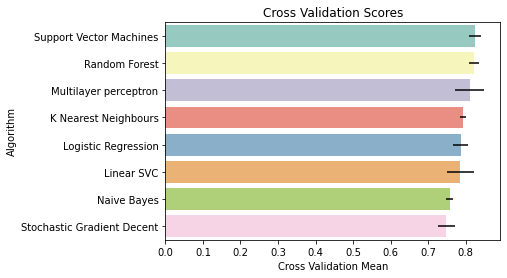

In [886]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cross_val_res, order = cross_val_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cross_val_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

Text(0.5, 1.0, 'Cross Validation Losses')

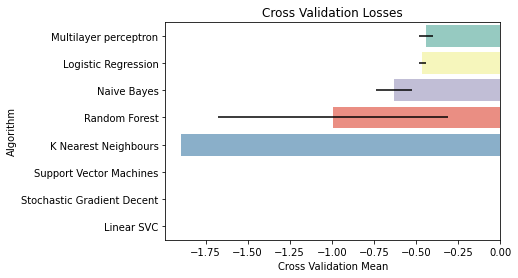

In [887]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cross_val_los, order = cross_val_los.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cross_val_loss_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Losses')

## 6.2 Tuning

### 6.2.1 Feature Tuning

The best remaining features can be found for each algorithm and the rest can be dropped for each respective algorithm. 

Logistic Regression

Optimal number of features: 6
Selected features: ['Pclass', 'Sex', 'Age', 'Embarked', 'Title', 'Age*Class']


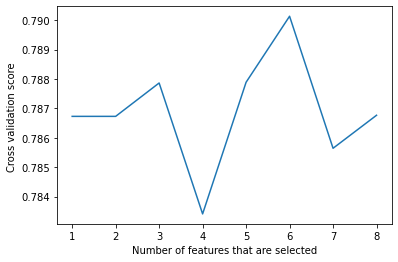

In [893]:
# the number of correct classifications (survived or did not survive) is proportional to the "accuracy" scoring
RFECV1 = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
RFECV1.fit(X_train, Y_train)

print("Optimal number of features: %d" % RFECV1.n_features_)
print('Selected features: %s' % list(X_train.columns[RFECV1.support_]))

# Plot the number of features VS. the CV scores
plt.xlabel("Number of features that are selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(RFECV1.grid_scores_) + 1), RFECV1.grid_scores_)
plt.show()

In [889]:
X_train_LR = X_train.drop(['byThemselves', 'Fare'], axis =1).copy()
X_test_LR = X_test.drop(['byThemselves', 'Fare'], axis =1).copy()

Random Forest

Optimal number of features: 5
Selected features: ['Pclass', 'Sex', 'Fare', 'Title', 'Age*Class']


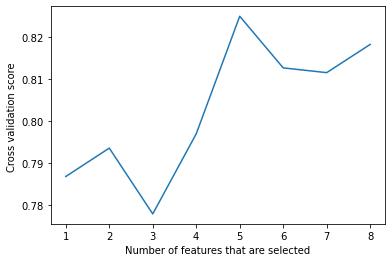

In [890]:
RFECV2 = RFECV(estimator=RandomForestClassifier(), step=1, cv=10, scoring='accuracy')
RFECV2.fit(X_train, Y_train)

print("Optimal number of features: %d" % RFECV2.n_features_)
print('Selected features: %s' % list(X_train.columns[RFECV2.support_]))

# Plot the number of features VS. the CV scores
plt.xlabel("Number of features that are selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(RFECV2.grid_scores_) + 1), RFECV2.grid_scores_)
plt.show()


In [891]:
#based on the above, for Random Forest we should drop 3 columns
X_train_RF = X_train.drop(['Age'], axis =1).copy()
X_test_RF = X_test.drop(['Age'], axis =1).copy()

MLP and KNN have intrinsic feature importance selection and so do not need to have it manually performed. 

### 6.2.2 Hyperparameter Tuning
Hyperparameter tuning is the process of tuning the parameters of a model.

#### 6.2.2.1 Hyperparameter tuning for MLP

In [801]:
mlp = MLPClassifier(max_iter=50)
param_grid = {'alpha': [1,1e-3,1e-5],  
              'hidden_layer_sizes': [(50,50,50),(3,), (50,190,3), (64,64,64) ],
              'activation': ['tanh','relu','logistic'],  
              'solver': ['sgd','adam'],
              'learning_rate': ['constant','adaptive']
}
grid = GridSearchCV(mlp, param_grid,n_jobs=-1, cv=5) 
grid.fit(X_train, Y_train)
MLP_tuned= grid.best_estimator_
MLP_trained_tuned=MLP_tuned.fit(X_train, Y_train)
print("Best parameters: ", grid.best_params_) 
Y_pred = MLP_trained_tuned.predict(X_test)
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.to_csv("submissionMLP.csv", index = False)



Best parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 64, 64), 'learning_rate': 'constant', 'solver': 'adam'}



The multilayer perceptron(MLP) is an Artificial neural network with one or more  hidden layers. The MLP has the advantage over the Perceptron algorithm in that it is able to handle non linear mapping of inputs to outputs. The MLP is a feedforward algorithm that performs a weighted summation of the inputs and their respective weights. This summation is then fed into a activation function such as ReLU to determine the output. The output of each of this nodes is then fed into the next hidden layers and then to the output. The MLP also has back propagation which allows it to iteratively adjust the weights in the network to reduce the cost function. The MLP was chosen for hyperparameter tuning as it has one of the highest accuracy scores and one of the lowest standard deviations (Bento, 2021).


Using the GridSearchCV method with the following parameters: a grid of hyperparameters and a K-fold cross validation value. The parameter grid includes the alpha value used for regularization(which reduces overfitting), values for how many nodes in each of the 3 hidden layers , the activation function , the solver used for backpropagation and the learning rate. The gridSearchCV then finds the parameters which result in the highest accurcay (1.17. Neural network models (supervised), n.d.).

Bento, C., 2021. Multilayer Perceptron Explained with a Real-Life Example and Python Code: Sentiment Analysis. [online] Medium. Available at: <https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141> [Accessed 14 June 2022].

scikit-learn. n.d. 1.17. Neural network models (supervised). [online] Available at: <https://scikit-learn.org/stable/modules/neural_networks_supervised.html> [Accessed 14 June 2022].

(Aiden)

#### 6.2.2.2 Hyperparameter tuning for KNN



In [802]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5,n_jobs=-1 )
grid.fit(X_train, Y_train)
KNN_tuned = grid.best_estimator_
KNN_trained_tuned=KNN_tuned.fit(X_train, Y_train)
survival_predications2=KNN_trained_tuned.predict(X_test)
print("Best parameters: ", grid.best_params_) 
Y_pred = KNN_trained_tuned.predict(X_test)
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.to_csv("submissionKNN.csv", index = False)

Best parameters:  {'leaf_size': 45, 'n_neighbors': 7, 'p': 1}


Explanation

#### 6.2.3 Hyperparameter tuning for Random Forest

In [803]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 40, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [  200, 1000,1600 ,1800, 2000]}

#randomzed search to decrease time frame
grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, refit = True, n_iter = 25, cv = 5, verbose=3, n_jobs =-1)
grid.fit(X_train_RF, Y_train)
RF_tuned = grid.best_estimator_
RF_trained_tuned = RF_tuned.fit(X_train_RF, Y_train) #using the feature tuning sets
print("Best parameters: ", grid.best_params_)
Y_pred = RF_trained_tuned.predict(X_test_RF)
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.to_csv("submissionRF.csv", index = False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters:  {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


The Random Forest algorithm is considered a good classifying model( Dedja et al, 2022). It is a supervised machine learning algorithm. As it was one of the selected algorithms that produced one of the highest cross-validation accuracy scores and one of the lowest cross-validation loss scores, it was chosen to be tuned and retrained. The random forest machine learning algorithm takes the output of multiple decision trees and ‘democratically’ chooses the final outcome (Tibco, 2022). 

Decision trees themselves essentially ask true or false questions that lead to a final answer. In other words, each question (for example, ‘male’ or ‘female’?) is a node, and the outcome is a leaf node (Yiu, 2019). The idea is to have results of subgroups that are similar to one another but are different from the other groups (Yiu, 2019). The random forest works well because while some decision trees may be wrong, many others will be correct. Therefore, as a group, the decision trees can move in the right direction (Yiu, 2019). By using a concept known as ‘bagging,’ where each individual decision tree can randomly sample from the training dataset, with replacement, random forest will have different trees and therefore a low correlation between them (Yiu, 2019). The uncorrelated errors between the different trees means that they ‘protect each other’ from their individual errors. This generally results in a precise classifying algorithm overall. 

Using the RandomizedSearchCV method for time-efficiency, a grid of hyperparameters can be randomly sampled, with K-Fold cross-validation being performed with each combination of parameter values.  The hyperparameters that were searched through include: number of trees in the forest; number of data points per node before it must be split; minimum number of data points allowed in a leaf node; the maximum number of levels of each tree; and with or without replacement. Thereafter, the model is then retrained using the new-found ‘best’ hyperparameters


Dedja,K., Pliakos,K., Vens,C., 2022. Explaining random forest prediction through diverse rulesets. 

TIBCO Software. 2022. What is a Random Forest?. [online] Available at: <https://www.tibco.com/reference-center/what-is-a-random-forest> [Accessed 14 June 2022].

Yiu, T., 2019. Understanding Random Forest. [online] Medium. Available at: <https://towardsdatascience.com/understanding-random-forest-58381e0602d2> [Accessed 3 June 2022].

(Ben)



#### 6.2.2.4 Hyperparameter tuning for LogReg

In [892]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['none','l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01,1e-05, 3, 0.1, 1e-4, 1e-2]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, error_score=0)

LR_trained_tuned = grid_search.fit(X_train_LR, Y_train)
LR_tuned = grid_search.best_estimator_
# summarize results
print("Best result of %f using %s" % (LR_trained_tuned.best_score_, LR_trained_tuned.best_params_))
means = LR_trained_tuned.cv_results_['mean_test_score']
stds = LR_trained_tuned.cv_results_['std_test_score']
params = LR_trained_tuned.cv_results_['params']
Y_pred = LR_trained_tuned.predict(X_test_LR)
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.to_csv("submissionLR.csv", index = False)


Best result of 0.793113 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Explanation

## Results after tuning:

The results after tuning 4 of the models, as well as the original cross-validation scores for the models that were utilised but not tuned. 

In [805]:
cross_val_results = []
cross_val_losses = []
# Train using each model, finding accuracy and loss. :
cross_val_results.append(cross_val_score(RF_tuned, X_train_RF, Y_train, scoring = 'accuracy', cv = 5))
cross_val_losses.append(cross_val_score(RF_tuned, X_train_RF, Y_train, scoring = 'neg_log_loss', cv = 5))
cross_val_results.append(cross_val_score(KNN_tuned, X_train, Y_train, scoring = 'accuracy', cv = 5))
cross_val_losses.append(cross_val_score(KNN_tuned, X_train, Y_train, scoring = 'neg_log_loss', cv = 5))
cross_val_results.append(cross_val_score(LR_tuned, X_train_LR, Y_train, scoring = 'accuracy', cv = 5))
cross_val_losses.append(cross_val_score(LR_tuned, X_train_LR, Y_train, scoring = 'neg_log_loss', cv = 5))
cross_val_results.append(cross_val_score(MLP_tuned, X_train, Y_train, scoring = 'accuracy', cv = 5))
cross_val_losses.append(cross_val_score(MLP_tuned, X_train, Y_train, scoring = 'neg_log_loss', cv = 5))

remaining_classifiers = [  
                GaussianNB(),
                SVC(),  
                SGDClassifier(), 
                LinearSVC(),
               ]


for classifier in remaining_classifiers:
    cross_val_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 5))
    cross_val_losses.append(cross_val_score(classifier, X_train, Y_train, scoring = 'neg_log_loss', cv = 5))

In [806]:
# Mean and standard deviation of cross validation results for each classifier  

cross_val_mean = []
cross_val_std = []
cross_val_loss_mean =[]
cross_val_loss_std = []

for cross_val_result in cross_val_results:
    cross_val_mean.append(cross_val_result.mean())
    cross_val_std.append(cross_val_result.std())

for cross_val_loss in cross_val_losses:
    cross_val_loss_mean.append(cross_val_loss.mean())
    cross_val_loss_std.append(cross_val_loss.std())    

    
    
#putting our cross val mean and standard deviation for each algorithm into a data frame
cross_val_res = pd.DataFrame({'Cross Validation Mean': cross_val_mean, 'Cross Validation Std': cross_val_std, 'Algorithm': [ 'Random Forest', 'K Nearest Neighbours','Logistic Regression','Multilayer perceptron','Naive Bayes', 'Support Vector Machines', 'Stochastic Gradient Decent', 'Linear SVC']})
cross_val_los = pd.DataFrame({'Cross Validation Mean': cross_val_loss_mean, 'Cross Validation Std': cross_val_loss_std, 'Algorithm':  [ 'Random Forest', 'K Nearest Neighbours','Logistic Regression','Multilayer perceptron','Naive Bayes', 'Support Vector Machines', 'Stochastic Gradient Decent', 'Linear SVC']})
print('Table Showing Cross Validation Mean Accuracy')
print(cross_val_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True))
print('\nTable Showing Cross Validation Mean Loss')
print(cross_val_los.sort_values(by = 'Cross Validation Mean', ascending = True, ignore_index = True))

Table Showing Cross Validation Mean Accuracy
   Cross Validation Mean  Cross Validation Std                   Algorithm
0               0.823765              0.019224     Support Vector Machines
1               0.822692              0.023013               Random Forest
2               0.822679              0.009636       Multilayer perceptron
3               0.821555              0.022804        K Nearest Neighbours
4               0.794589              0.019225         Logistic Regression
5               0.785626              0.009837                  Linear SVC
6               0.765470              0.028595  Stochastic Gradient Decent
7               0.757661              0.039413                 Naive Bayes

Table Showing Cross Validation Mean Loss
   Cross Validation Mean  Cross Validation Std                   Algorithm
0              -1.379168              0.679680        K Nearest Neighbours
1              -0.847107              0.465574               Random Forest
2            

#### Observation 

The tuned algorithms show improvement in accuracy as compared to before being tuned.

### 6.3.4 Ensembles

If cross-val scores were above 80 and the loss was above -2, assign a weighting of 2. Otherwise 1. 

In [807]:

#train the other models now with no validation set to be used in the ensemble
GNBtrained=GaussianNB().fit(X_train, Y_train)
SVCtrained=SVC().fit(X_train, Y_train)
LSVCtrained=LinearSVC().fit(X_train, Y_train)
SGDtrained=SGDClassifier().fit(X_train, Y_train)

voting_classifier_hard = VotingClassifier(estimators = [('mlp',MLP_trained_tuned),('knn',KNN_trained_tuned),('knn2',KNN_trained_tuned),('lg',LR_trained_tuned),('rf',RF_trained_tuned),('rf2',RF_trained_tuned),('gnb',GNBtrained),('svc',SVCtrained),('svc2',SVCtrained),('lsvc',LSVCtrained),('sgd',SGDtrained)], voting = 'hard') 
voting_classifier_hard_trained=voting_classifier_hard.fit(X_train, Y_train)
survival_predications=voting_classifier_hard_trained.predict(X_test)

CV = cross_val_score(voting_classifier_hard,X_train,Y_train,cv=5)
print('voting classifier cross validation score :',CV)
print('voting classifier cross validation score mean :',CV.mean())
print('voting classifier cross validation score standard deviation :',CV.std())

voting classifier cross validation score : [0.83240223 0.81460674 0.8258427  0.79775281 0.84269663]
voting classifier cross validation score mean : 0.8226602222082731
voting classifier cross validation score standard deviation : 0.015438460667481625


# 7. Preparing data for submission

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [808]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': survival_predications})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Our dataframe is ready for submission!

In [809]:
# Create and save csv file 
submit.to_csv("submission.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion



## References
https://github.com/chongjason914/kaggle-titanic 

https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://github.com/murilogustineli/Titanic-Classification

https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

